## Overview

For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder

 # 1. Business Understanding

**Project goal:** Help the company decide which aircraft types to purchase by identifying the lowest-risk aircraft 
This analysis reveals:
- Which aircraft  make and model have lower risks. 
- Data-backed recommendations that are easy for stakeholders to understand 
- What injuries are frequent.  
- Whether accidents are decreasing or increasing over time. 



# 2. Data Understanding
The dataset used is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters., which contains records of:

  - Aircraft make and model

  - Number of injuries (fatal, serious, minor)
  
  - Accident details


In [699]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [700]:
# load the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
# Display the first 5 rows of the dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [701]:
# Get the shape of the dataframe(How many rows and columns)
df.shape

(88889, 31)

In [702]:
# Get information about the dataframe including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [703]:
# Get statistical summary of numerical columns in the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [704]:
df.duplicated().sum()

0

In [705]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

# 3. Data Preparation

In this section, I will prepare the aviation accident dataset for analysis.  
The goal of data preparation is to clean only the columns needed to answer the business question:

**“Which aircraft has the lowest risk for the company to purchase?”** 

**Key Columns Used:**

  - Make
  - Model
  - Total injuries(Fatal, serious, minor, uninjured)
  - Event Time
  - Aircraft Category
  - Injury Severity



### 3.1 Dropping and handling missing values

In [706]:
# 1. DROP UNNECESSARY COLUMNS
columns_to_drop = [
    'Publication.Date', 'Report.Status', 'Airport.Code','Air.Carrier'
    'Latitude', 'Longitude', 'Airport.Name', 'FAR.Description',
    'Schedule', 'Registration.Number'
]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 2. HANDLE MISSING VALUES

# Fill categorical columns with "Unknown"

categorical_unknown = [
    'Make', 'Model', 'Engine.Type', 'Aircraft.Category',
    'Broad.phase.of.flight', 'Weather.Condition', 'Country', 'Injury.Severity', 'Aircraft.damage'
]

for col in categorical_unknown:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Fill numeric injury columns with 0
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
df[injury_cols] = df[injury_cols].fillna(0)

# Drop rows with missing aircraft make
df = df.dropna(subset=["Make"])

# Fill number of engines with mode
if 'Number.of.Engines' in df.columns:
    df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])



### 3.2 Creating a Total Injuries Column

In [707]:
 # Creating Total Injuries Columndf
df['Total_Injuries'] = (  
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries']
)

### 3.3 Stripping all string columns 

In [708]:
# Select all columns with 'object' dtype (strings)
object_cols = df.select_dtypes(include=['object']).columns

# Apply the strip operation to all of them
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())
# Verify that leading/trailing spaces are removed
df[object_cols].head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,Reciprocating,Personal,NaN,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,Reciprocating,Personal,NaN,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,Fatal(3),Destroyed,Unknown,Cessna,172M,No,Reciprocating,Personal,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Unknown,Rockwell,112,No,Reciprocating,Personal,NaN,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Personal,NaN,VMC,Approach


### 3.4 Converting Data Types

In [709]:
# Convert 'Event.Date' to datetime objects
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Create new features from the date
df['Event_Year'] = df['Event.Date'].dt.year
df['Event_Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: Event_Year, Length: 88889, dtype: int64

### 3.5 Filtering Reliable Aircraft Data

In [710]:
aircraft_counts = df['Make'].value_counts()
valid_aircraft = aircraft_counts[aircraft_counts >= 20].index
df_filtered = df[df['Make'].isin(valid_aircraft)]
df_filtered['Make'].value_counts()

Cessna                           22227
Piper                            12029
CESSNA                            4922
Beech                             4330
PIPER                             2841
                                 ...  
American Aviation Corp. (aac)       20
Flight Design                       20
Extra Flugzeugbau                   20
Casa                                20
Johnson                             20
Name: Make, Length: 217, dtype: int64

### 3.6 Checking for outliers

In [711]:
# Sample data
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Calculate Q1, Q3, and IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

# Detect outliers
outliers = outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f'Outliers in {col}: {outliers.shape[0]}')




Outliers in Total.Uninjured: 4147


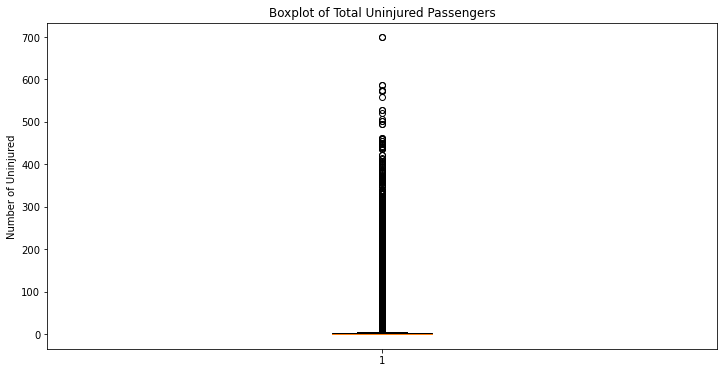

In [712]:
# Boxplot for Total Uninjured Passengers
plt.figure(figsize=(12, 6))
plt.boxplot(df['Total.Uninjured'].dropna())
plt.title('Boxplot of Total Uninjured Passengers')
plt.ylabel('Number of Uninjured')
plt.show()

### Outliers in Total.Uninjured

A large number of outliers were detected in the `Total.Uninjured` column.
These values represent accidents involving aircraft with many passengers,
particularly commercial aircraft.
The boxplot for `Total.Uninjured` variable shows a strong right-skewed distribution,
with many high values corresponding to large commercial aircraft.

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88889 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Injury.Severity         88889 non-null  object        
 8   Aircraft.damage         88889 non-null  object        
 9   Aircraft.Category       88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88787 non-null  object

In [714]:
# save cleaned dataframe to csv (use DataFrame.to_csv)
df.to_csv('AviationData_Cleaned.csv', index=False)

print("Saved cleaned dataframe to 'AviationData_Cleaned.csv'")

Saved cleaned dataframe to 'AviationData_Cleaned.csv'


# 4. Data analysis
This section applies data analysis techniques including filtering,
grouping, aggregation, and sorting to answer key business questions.It also includes visualization to give clear insights.





Cessna      27149
Piper       14870
Beech        5372
Boeing       2745
Bell         2722
Mooney       1334
Robinson     1230
Grumman      1172
Bellanca     1045
Hughes        932
Name: Make, dtype: int64


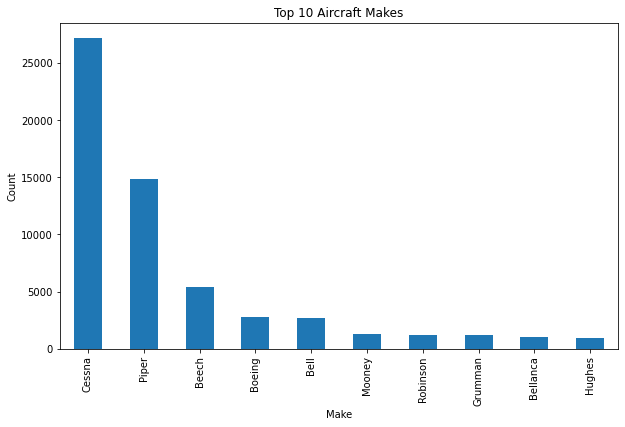

In [715]:
## Checking Top 10 Makes to use for Analysis
df['Make'] = df['Make'].str.title()
top_makes = df['Make'].value_counts().head(10)
top_makes.plot(kind='bar', figsize=(10, 6), title='Top 10 Aircraft Makes')

print(top_makes)

plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

In [716]:

#Keep the Top 10 Makes for Analysis
# Identify top 10 aircraft makes after cleaning
top_10_makes = df['Make'].value_counts().head(10).index

# Filter dataset
top_df = df[df['Make'].isin(top_10_makes)].copy()


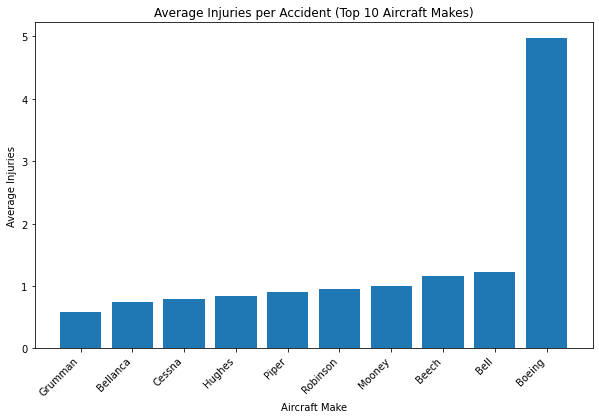

In [717]:
risk_summary = (
    top_df
    .groupby('Make')
    .agg(
        accident_count=('Make', 'count'),
        avg_injuries=('Total_Injuries', 'mean'),
        total_injuries=('Total_Injuries', 'sum')
    )
    .sort_values('avg_injuries')
)

plt.figure(figsize=(10, 6))
plt.bar(risk_summary.index, risk_summary['avg_injuries'])
plt.title('Average Injuries per Accident (Top 10 Aircraft Makes)')
plt.xlabel('Aircraft Make')
plt.ylabel('Average Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()


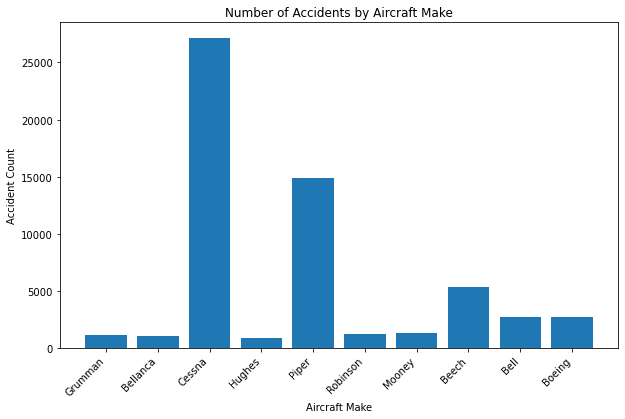

In [718]:
# accident count by make
plt.figure(figsize=(10, 6))
plt.bar(risk_summary.index, risk_summary['accident_count'])
plt.title('Number of Accidents by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')
plt.show()


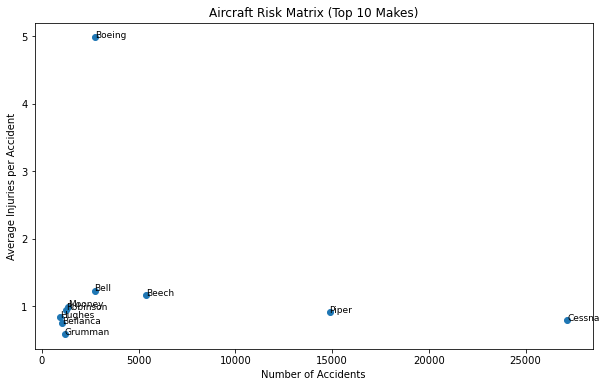

In [719]:
# plot risk matrix
plt.figure(figsize=(10, 6))
plt.scatter(
    risk_summary['accident_count'],
    risk_summary['avg_injuries']
)

for make in risk_summary.index:
    plt.text(
        risk_summary.loc[make, 'accident_count'],
        risk_summary.loc[make, 'avg_injuries'],
        make,
        fontsize=9
    )

plt.xlabel('Number of Accidents')
plt.ylabel('Average Injuries per Accident')
plt.title('Aircraft Risk Matrix (Top 10 Makes)')
plt.show()


In this cell we see which has the lower injury risk by make and model

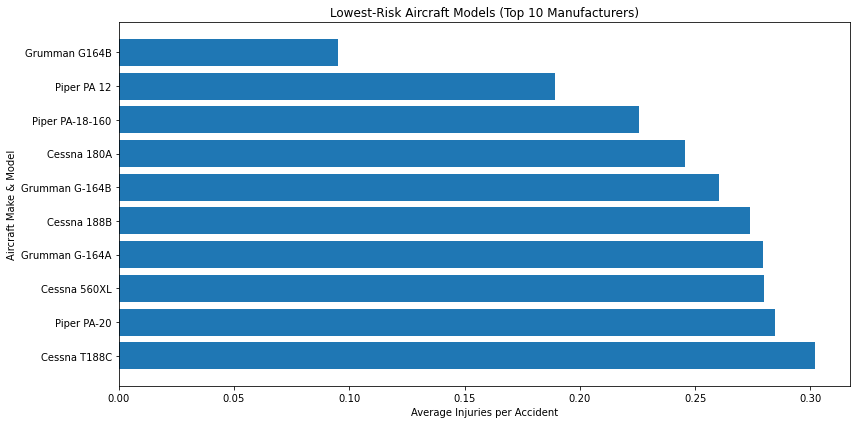

In [720]:
# Lowest-Risk Aircraft Models (Top 10 Manufacturers)
make_model_risk = (top_df.groupby(["Make", "Model"]).agg( Accidents=("Model", "count"),Avg_Injuries=("Total_Injuries", "mean")).reset_index())
make_model_risk = make_model_risk[make_model_risk["Accidents"] >= 20]
low_risk_aircraft = make_model_risk.sort_values("Avg_Injuries")
top10 = low_risk_aircraft.head(10)

plt.figure(figsize=(12, 6))

plt.barh(
    top10["Make"] + " " + top10["Model"],
    top10["Avg_Injuries"]
)

plt.xlabel("Average Injuries per Accident")
plt.ylabel("Aircraft Make & Model")
plt.title("Lowest-Risk Aircraft Models (Top 10 Manufacturers)")

plt.gca().invert_yaxis()  # lowest risk on top
plt.tight_layout()
plt.show()


Its seen above Grumman,Boeing 737 have lower risk in injuries 

### Trend analysis over time

In the cell below we see if the number of accidents decrease or increase over time.

Event_Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64


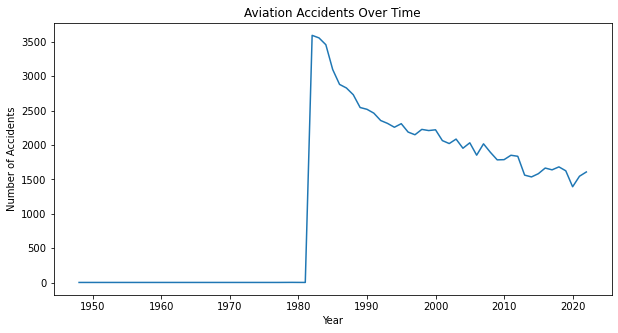

In [721]:
# Aviation Accidents Over Time
accidents_by_year = (
    df.groupby('Event_Year')
    .size()
)
print(accidents_by_year)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    accidents_by_year.index,
    accidents_by_year.values
)

ax.set_title('Aviation Accidents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')

plt.show()


From 1950 to 1980 there were low to no accidents which rose from 1981.It started dropping teadily to 2020 which suggests number of acidents reduces over time.

### Engine Type with least Fatal Injuries

In the cell below I will check which engine has low fatal injuries

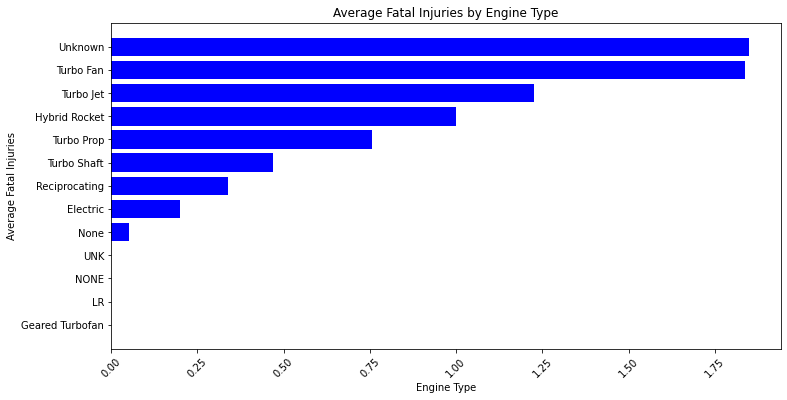

In [722]:
# Average fatal injuries by engine type
engine_type_risk = (
    df.groupby('Engine.Type')['Total.Fatal.Injuries']
    .mean()
    .sort_values()
)

# Plotting the average fatal injuries by engine type
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(
    engine_type_risk.index,
    engine_type_risk.values,
    color='blue'
)

ax.set_title('Average Fatal Injuries by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Average Fatal Injuries')
ax.tick_params(axis='x', rotation=45)

plt.show()


Geared Turbofan ,LR, UNK has no fatal injury while Turbo Fan has the highest Fatal injuries

### Passenger Survivability by Aircraft Category

Passenger survivability was assessed using the number of uninjured occupants
associated with each aircraft category.


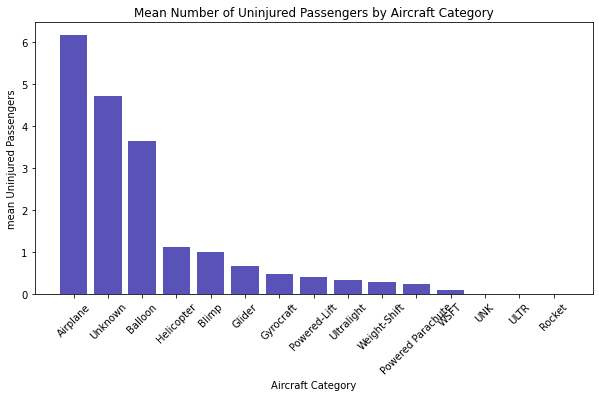

In [723]:
survivability = (
    df.groupby('Aircraft.Category')['Total.Uninjured']
    .mean()
    .sort_values(ascending=False)
)
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    survivability.index,
    survivability.values,
    color="#5952b7"
)

ax.set_title('Mean Number of Uninjured Passengers by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('mean Uninjured Passengers')
ax.tick_params(axis='x', rotation=45)

plt.show()


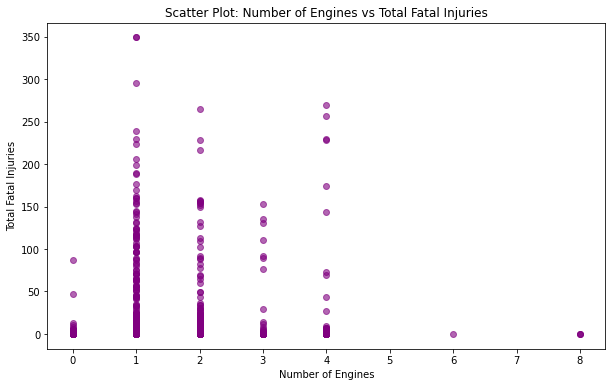

In [724]:
# SCATTER PLOT BETWEEN NUMBER OF ENGINES AND TOTAL FATAL INJURIES
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Number.of.Engines'],
    df['Total.Fatal.Injuries'],
    alpha=0.6,
    color='purple'
)
plt.title('Scatter Plot: Number of Engines vs Total Fatal Injuries')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.show()

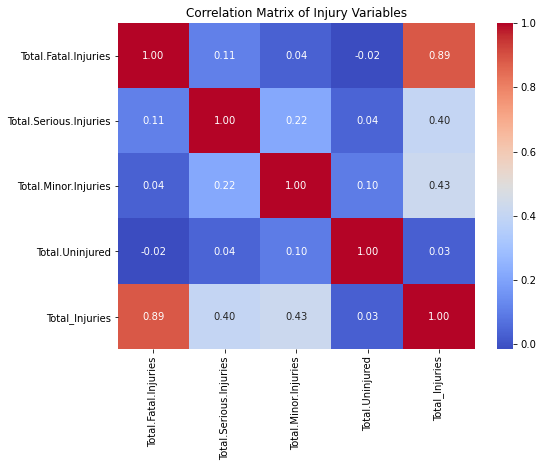

In [725]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Total_Injuries"
]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Injury Variables")
plt.show()


## Conclusion


Based on the analysis i conclude that:

- These are the top aircrafts that i used in my analysis to determin which aircraft to purchase Cessna, Piper,Beech, Bell, Boeing,  Grumman, Mooney.
- Cessna has high accident while Boeing,Grumman and Bell have the least      
- Injuries reduce from time as from 1981 to 2020 it lowered steadily
- In number of engines. 1 engine is seen to have a vast number in total fatal injuries while 3 is seen to have least number
- Aeroplanes have the least total uninjured in aeroplane category while WSFT has least
- Correlation analysis shows that, strong positive correlation among injury types fatal, serious, and minor injuries are strongly positively correlated while total.uninjured shows a negative correlation with injury variables.This concludes that Injury-related variables move together, indicating consistency in accident severity


## Recommendations

Based on the analysis of historical aviation accident data, the company should prioritize purchasing aircraft that demonstrate low injury severity, manageable accident frequency, and sufficient operational history.

**Aircraft Acquisition Strategy**

Focus on aircraft from manufacturers such as Grumman, Bellanca, Hughes, and select Cessna and Piper models, which consistently show lower average injuries per accident.

Avoid aircraft manufacturers and models that appear in the high-risk in the risk matrix, particularly those with high injury severity, such as certain Boeing models, despite their lower accident frequency.

 **Type and number of Engines**
  - Opt for aircraft with 2 or more engines for low fatality rate.The Geared Turbofan, LR and Electric have low fatality rate which is also recommended.

  **Trend Analysis**
  Choose aircraft models that are recent has they have low injury rate as trend shows decreasing accidents over time.


